In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Example 1

In [17]:
X = make_blobs(n_samples=50,n_features=2, centers=3)[0]
X = np.array(X)
print(X.shape)

(50, 2)


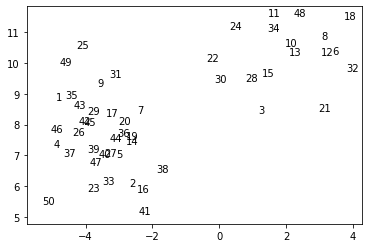

In [18]:
#plt.figure()
#plt.plot(X[:,0],X[:,1],'*')
#plt.show()
plt.figure()
plt.plot(X[:,0],X[:,1],'.',color='white')
for i in range(len(X)):
    plt.text(X[i,0],X[i,1],str(i+1))
plt.show()

### Hiearchical clustering

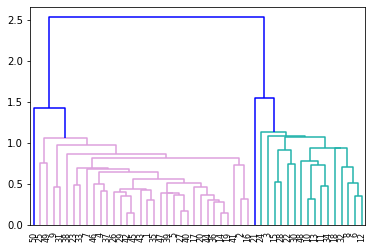

In [19]:
hierarchy.set_link_color_palette(['plum','lightseagreen', 'silver'])
Z = hierarchy.linkage(X, 'single')
dn = hierarchy.dendrogram(Z,labels=np.arange(1,len(X)+1),color_threshold=1.3)
plt.show()

In [20]:
g = hierarchy.fcluster(Z,t=2.0,criterion='distance')
print(g)


[1 1 2 1 1 2 1 2 1 2 2 2 2 1 2 1 1 2 1 1 2 2 1 2 1 1 1 2 1 2 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1]


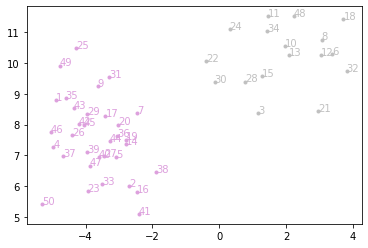

In [23]:
plt.figure()
plt.plot(X[g==1,0],X[g==1,1],'.',color='plum')
plt.plot(X[g==2,0],X[g==2,1],'.',color='silver')
for i in range(len(X)):
    if g[i]==1:
        plt.text(X[i,0],X[i,1],str(i+1),color='plum')
    else:
        plt.text(X[i,0],X[i,1],str(i+1),color='silver')
plt.show()

### k means

In [29]:
model = KMeans(n_clusters=2)
model.fit(X)
g = model.predict(X)
print(g)
print(model.cluster_centers_)

[0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
[[-3.70285263  7.55687898]
 [ 1.8935031  10.21740113]]


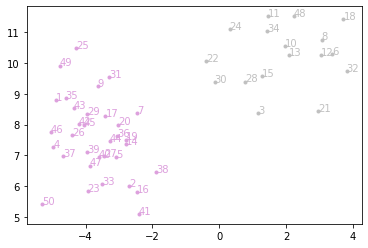

In [28]:
plt.figure()
plt.plot(X[g==0,0],X[g==0,1],'.',color='plum')
plt.plot(X[g==1,0],X[g==1,1],'.',color='silver')
for i in range(len(X)):
    if g[i]==0:
        plt.text(X[i,0],X[i,1],str(i+1),color='plum')
    else:
        plt.text(X[i,0],X[i,1],str(i+1),color='silver')
plt.show()

# Example 2

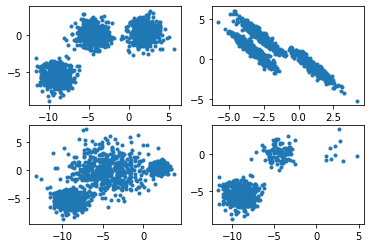

In [41]:
n_samples = 1500
random_state = 170
data1,y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
data2 = np.dot(data1, transformation) 
data3 = make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)[0]
data4 = np.vstack((data1[y == 0][:500], data1[y == 1][:100], data1[y == 2][:10]))

plt.figure()
plt.subplot(2,2,1)
plt.plot(data1[:,0],data1[:,1],'.')
plt.subplot(2,2,2)
plt.plot(data2[:,0],data2[:,1],'.')
plt.subplot(2,2,3)
plt.plot(data3[:,0],data3[:,1],'.')
plt.subplot(2,2,4)
plt.plot(data4[:,0],data4[:,1],'.')
plt.show()

In [44]:
g1 = KMeans(n_clusters=3).fit_predict(data1)
g2 = KMeans(n_clusters=3).fit_predict(data2)
g3 = KMeans(n_clusters=3).fit_predict(data3)
g4 = KMeans(n_clusters=3).fit_predict(data4)

[0 0 1 ... 2 2 2]


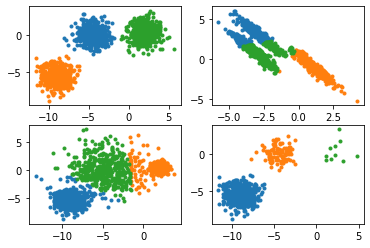

In [46]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(data1[g1==0,0],data1[g1==0,1],'.')
plt.plot(data1[g1==1,0],data1[g1==1,1],'.')
plt.plot(data1[g1==2,0],data1[g1==2,1],'.')
plt.subplot(2,2,2)
plt.plot(data2[g2==0,0],data2[g2==0,1],'.')
plt.plot(data2[g2==1,0],data2[g2==1,1],'.')
plt.plot(data2[g2==2,0],data2[g2==2,1],'.')
plt.subplot(2,2,3)
plt.plot(data3[g3==0,0],data3[g3==0,1],'.')
plt.plot(data3[g3==1,0],data3[g3==1,1],'.')
plt.plot(data3[g3==2,0],data3[g3==2,1],'.')
plt.subplot(2,2,4)
plt.plot(data4[g4==0,0],data4[g4==0,1],'.')
plt.plot(data4[g4==1,0],data4[g4==1,1],'.')
plt.plot(data4[g4==2,0],data4[g4==2,1],'.')
plt.show()

In [48]:
g1 = GaussianMixture(n_components=3).fit_predict(data1)
g2 = GaussianMixture(n_components=3).fit_predict(data2)
g3 = GaussianMixture(n_components=3).fit_predict(data3)
g4 = GaussianMixture(n_components=3).fit_predict(data4)

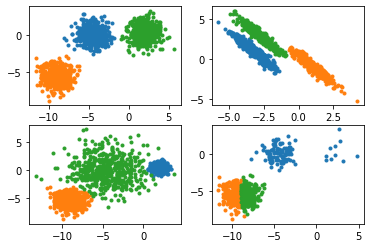

In [49]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(data1[g1==0,0],data1[g1==0,1],'.')
plt.plot(data1[g1==1,0],data1[g1==1,1],'.')
plt.plot(data1[g1==2,0],data1[g1==2,1],'.')
plt.subplot(2,2,2)
plt.plot(data2[g2==0,0],data2[g2==0,1],'.')
plt.plot(data2[g2==1,0],data2[g2==1,1],'.')
plt.plot(data2[g2==2,0],data2[g2==2,1],'.')
plt.subplot(2,2,3)
plt.plot(data3[g3==0,0],data3[g3==0,1],'.')
plt.plot(data3[g3==1,0],data3[g3==1,1],'.')
plt.plot(data3[g3==2,0],data3[g3==2,1],'.')
plt.subplot(2,2,4)
plt.plot(data4[g4==0,0],data4[g4==0,1],'.')
plt.plot(data4[g4==1,0],data4[g4==1,1],'.')
plt.plot(data4[g4==2,0],data4[g4==2,1],'.')
plt.show()